## This Notebook Scipt (PoC case study for Horizon AI) is for broader understanding in terms of data extraction from online media platforms and channels
## It is to be used for illustration purpose ONLY
### Authored by Ejaz Hussain - Last updated: 22-08-2025

## Step 1: Installation of Required Python Libraries & Dependencies [If Required]

In [30]:
#!pip3 install --upgrade pip

!pip3 install feedparser newspaper3k spacy streamlit bertopic scikit-learn sentence-transformers
!pip3 install requests
!pip3 install lxml_html_clean
!pip3 install wordcloud

### for bash -- python3 -m spacy download en_core_web_sm

## Step 2: Adds-on Required Libraries for Jupyter Notebook

In [31]:
import feedparser
import requests
import feedparser
import newspaper
from datetime import datetime
import pandas as pd
from bs4 import BeautifulSoup
import spacy
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

## Step 3: Check for Network Connection Issues

In [32]:
url = "http://feeds.nature.com/nature/rss"
headers = {
    "User-Agent": "Mozilla/5.0"
}

response = requests.get(url, headers=headers, timeout=10)
print("Status code:", response.status_code) # see if you have succssfully connected with '200' code value or not
print("Content (first 500 chars):")
print(response.text[:500])

Status code: 200
Content (first 500 chars):
<rdf:RDF xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#" xmlns:prism="http://prismstandard.org/namespaces/basic/2.0/" xmlns:dc="http://purl.org/dc/elements/1.1/"
         xmlns:content="http://purl.org/rss/1.0/modules/content/" xmlns="http://purl.org/rss/1.0/" xmlns:admin="http://webns.net/mvcb/">
    <channel rdf:about="http://feeds.nature.com/nature/rss/current">
        <title>Nature</title>
        <description>Nature is the foremost international weekly scientific journal in the wor


## Step 4: Data Ingestion Check on RSS Live Feeds

In [33]:
rss_url = "https://digital.nhs.uk/feed/all-blog-feed.xml"  # A reliable feed Check for PoC 
feed = feedparser.parse(rss_url)

print("Feed Title:", feed.feed.get("title", "N/A"))
print("Number of entries:", len(feed.entries))

for entry in feed.entries[:3]:
    print("---")
    print("Title:", entry.get("title"))
    print("Link:", entry.get("link"))

Feed Title: All Blog Feed
Number of entries: 10
---
Title: Cyber first responders: Strengthening NHS defences in the digital age
Link: https://digital.nhs.uk/blog/transformation-blog/2025/cyber-first-responders-strengthening-nhs-defences-in-the-digital-age
---
Title: Failure isn’t the end – it’s where better services begin
Link: https://digital.nhs.uk/blog/design-matters/2025/failure-isnt-the-end---its-where-better-services-begin
---
Title: An easier way to manage vaccinations in schools
Link: https://digital.nhs.uk/blog/transformation-blog/2025/an-easier-way-to-manage-vaccinations-in-schools


## Step 5: Data Ingestion from Known RSS Live Feeds with Functional Set Criteria

In [34]:
# Functional Set Criteria for RSS Live Feeds 
def fetch_articles_simple(rss_urls, max_articles=10):
    articles = []
    headers = {
        "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7)"
    }
    for url in rss_urls:
        print(f"\n📡 Parsing feed: {url}")
        feed = feedparser.parse(url)

        if not feed.entries:
            print("⚠️  No entries found.")
            continue

        for entry in feed.entries[:max_articles]:
            try:
                title = entry.get("title", "No title")
                link = entry.get("link", "")
                summary = entry.get("summary", "")

                # Fetch and ingest article content
                response = requests.get(link, headers=headers, timeout=10)
                soup = BeautifulSoup(response.text, "html.parser")
                paragraphs = soup.find_all("p")
                full_text = " ".join(p.get_text() for p in paragraphs)

                # Skip if empty
                if not full_text.strip():
                    print("⚠️ Skipped blank article.")
                    continue

                articles.append({
                    "title": title,
                    "summary": summary,
                    "text": full_text[:3000],
                    "published": entry.get("published", ""),
                    "source": link
                })
                print(f"✅ {title}")
            except Exception as e:
                print(f"❌ Failed to fetch article: {e}")
                continue

    df = pd.DataFrame(articles)
    df.to_csv("articles.csv", index=False) # To save as csv 
    print(f"\n✅ Total articles saved: {len(df)}")
    return df

# Example RSS Feeds - Add more Media Stream / RSS for data ingestions workflow
RSS_FEEDS = [
    "http://feeds.bbci.co.uk/news/health/rss.xml",       #BBC i RSS Feeds
    "http://feeds.nature.com/nature/rss.xml",            #Nature RSS Feeds
    "https://digital.nhs.uk/feed/all-blog-feed.xml",     #NHS All Blogs Feeds
    "https://digital.nhs.uk/feed/tech-talk-feed.xml",    #NHS Tech Talks Feeds
]
df_articles = fetch_articles_simple(RSS_FEEDS)


📡 Parsing feed: http://feeds.bbci.co.uk/news/health/rss.xml
✅ Reports of OCD among under-25s triple in 10 years
✅ Mum is first UK patient to trial new MS treatment
✅ Resident doctors announce five-day strike in November
✅ Local health hubs at risk as community services under strain
✅ Home fined after two disabled residents drowned
✅ Midwife open to leading other maternity inquiries
✅ CQC chief resigns over maternity failings
✅ Menopause screening to be included in NHS health checks from next year
✅ Life-changing eye implant helps blind patients read again
✅ Call for allergy pens in schools after boy's death

📡 Parsing feed: http://feeds.nature.com/nature/rss.xml
✅ How to grow crystals when and where you want them
✅ Audio long read: How to get the best night’s sleep — what the science says
✅ Sugarcane genomes offer sweet surprise: mystery ancestor
✅ Ancient graffiti and brain complexities: Books in brief
✅ China seeks self-reliance in science in next five-year plan
✅ Chen-Ning Yang obi

In [35]:
print(df_articles) # To view extracted live streams / RSS

                                                title  \
0   Reports of OCD among under-25s triple in 10 years   
1   Mum is first UK patient to trial new MS treatment   
2   Resident doctors announce five-day strike in N...   
3   Local health hubs at risk as community service...   
4     Home fined after two disabled residents drowned   
5   Midwife open to leading other maternity inquiries   
6           CQC chief resigns over maternity failings   
7   Menopause screening to be included in NHS heal...   
8   Life-changing eye implant helps blind patients...   
9   Call for allergy pens in schools after boy's d...   
10  How to grow crystals when and where you want them   
11  Audio long read: How to get the best night’s s...   
12  Sugarcane genomes offer sweet surprise: myster...   
13  Ancient graffiti and brain complexities: Books...   
14  China seeks self-reliance in science in next f...   
15  Chen-Ning Yang obituary: intuitive physicist w...   
16  AI chatbots are sycophants 

## Step 6: Named Entity Recognition (NER) for the Latest Trends and Keywords

In [36]:
# Applying NLP Practice for Trends and Patterns

nlp = spacy.load("en_core_web_sm")

def extract_trends_from_articles(df, text_column='text', top_n=20):
    all_entities = []

    for doc_text in df[text_column]:
        doc = nlp(str(doc_text))

        # Extract useful entity types
        entities = [
            ent.text for ent in doc.ents
            if ent.label_ in {"ORG", "GPE", "PERSON", "PRODUCT", "EVENT", "NORP"}
        ]
        all_entities.extend(entities)

    return Counter(all_entities).most_common(top_n)

# Run on your data
df_articles = pd.read_csv("articles.csv")
trends = extract_trends_from_articles(df_articles)

print("Top Detected Entities (Trends Analysis):")
for entity, count in trends:
    print(f"{entity} → {count}")

Top Detected Entities (Trends Analysis):
NHS → 67
API → 47
Digital → 16
China → 13
EPS → 13
England → 12
GP → 12
the NHS App → 12
UK → 10
Leeds → 10
CSS → 10
JavaScript → 10
AI → 10
Spine → 10
NHS Digital → 9
London → 8
Nottingham → 8
CQC → 7
Yang → 7
FHIR → 7


## Step 7: Word Cloud Search and Visual for the Latest Trends and Keywords

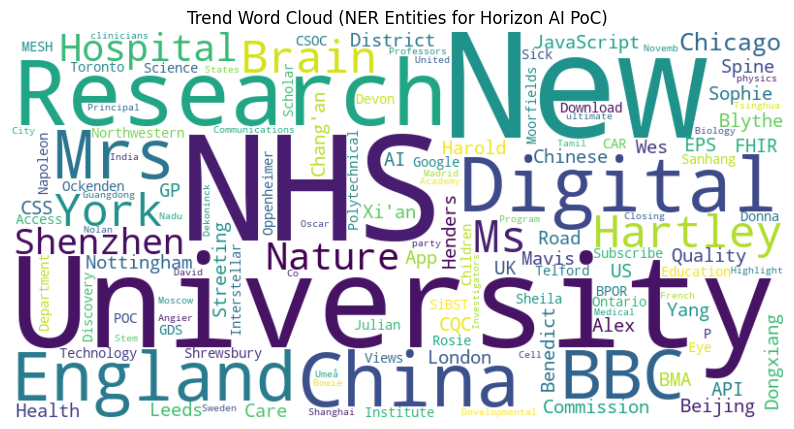

In [43]:
entities = extract_trends_from_articles(df_articles, top_n=100)

if not entities:
    print("No entities found – check RSS feed content or NER extraction.")
else:
    text = " ".join([entity for entity, _ in entities])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 15))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("Trend Word Cloud (NER Entities for Horizon AI PoC)")
    plt.show()


# The PoC Script Ends Here...